# Florence dataset

In [1]:
import sys; sys.path.insert(0,"../")
import numpy as np
%matplotlib notebook

import mview

sys.path.insert(0,"../examples/florence/")
import setup as florence

The following are visualizations for the Florence dataset.

## General stats

The set of families, along with number of times they appear in the data set, is:

In [2]:
families = florence.families
for family, count in zip(families,florence.families_count):
    print(f"{family}({count})", end=", ")

Acciaiuoli(4), Adimari(13), Albizzi(24), Aldobrandini(3), Altoviti(11), Ardinghelli(20), Arnolfi(3), Arrighi(1), Arrigucci(4), Baldovinetti(15), Barbadori(18), Bardi(38), Baroncelli(5), Baronci(2), Bartoli(2), Belfradelli(10), Bencivenni(9), Benizzi(14), Berlinghieri(2), Bischeri(6), Brancacci(7), Bucelli(4), Busini(4), Capponi(5), Carducci(7), Carnesecchi(5), Castellani(23), Cavalcanti(10), Ciai(2), Corbinelli(5), Corsi(3), Da Panzano(2), Da Uzzano(12), Dall'Antella(4), Davanzati(9), Degli Agli(3), Del Forese(3), Del Palagio(3), Della Casa(12), Dietisalvi(7), Doffi(1), Donati(8), Fagni(2), Fioravanti(5), Fortini(2), Frescobaldi(8), Gianfigliazzi(17), Ginori(9), Giugni(8), Guadagni(10), Guasconi(18), Guicciardini(28), Lamberteschi(11), Lapi(1), Mancini(1), Manelli(15), Manovelli(12), Martelli(14), Medici(128), Orlandini(10), Panciatichi(15), Pandolfini(7), Pazzi(8), Pecori(3), Pepi(4), Peruzzi(35), Pitti(3), Raugi(1), Ricasoli(20), Ridolfi(4), Rondinelli(17), Rossi(10), Rucellai(2), Sa

The attribute types, along with the number of times they appear in the data set, is:

In [3]:
attributes = florence.attributes
for attribute, count in zip(attributes,florence.attributes_count):
    print(f"{attribute}({count})", end=", ")

marriage(157), business(58), partnerships(29), bankemployment(14), realestate(12), patronage(44), loan(87), friendship(17), mallevadori(31), 

## 2 attributes: marriage and loan

In [4]:
attributes2 = ['marriage','loan']

We reduce the families to those that have connections in each of the attributes of interest:

In [5]:
families2 = florence.reduce_families(attributes2)
marriage_count = florence.count_occurrences('marriage',families2)
loan_count = florence.count_occurrences('loan',families2)
for family, count1, count2 in zip(families2,marriage_count,loan_count):
    print(f"{family}({count1},{count2})",end=", ")

Adimari(4,3), Ardinghelli(5,10), Arrigucci(1,1), Baldovinetti(2,2), Barbadori(7,6), Bardi(12,4), Belfradelli(1,5), Bencivenni(3,3), Bischeri(2,1), Brancacci(2,1), Busini(1,2), Carducci(1,1), Castellani(8,5), Cavalcanti(3,2), Ciai(1,1), Corbinelli(1,1), Da Uzzano(2,4), Davanzati(2,1), Degli Agli(2,1), Del Forese(1,1), Della Casa(4,2), Donati(1,2), Fioravanti(2,3), Gianfigliazzi(12,1), Ginori(5,4), Giugni(4,1), Guadagni(7,1), Guicciardini(11,4), Lamberteschi(1,7), Manelli(1,2), Manovelli(3,4), Medici(33,25), Orlandini(1,5), Panciatichi(10,1), Pandolfini(2,5), Pazzi(1,3), Pecori(1,1), Peruzzi(11,7), Ricasoli(12,6), Rondinelli(7,2), Rossi(3,3), Salviati(6,5), Scambrilla(1,2), Serragli(1,1), Serristori(1,3), Spini(5,1), Strozzi(23,3), Tornabuoni(4,1), 

We form a similarity graph for each attribute (containing list of edges and corresponding number of appereances).

In [6]:
marriage_edges, marriage_counts = \
florence.similarity_graph('marriage',allowed_families=families2)
marriage_dissimilarities = 1.0/np.array(marriage_counts)

loan_edges, loan_counts = \
florence.similarity_graph('loan',allowed_families=families2)
loan_dissimilarities = 1.0/np.array(loan_counts)

We set up the set of dissimilarities using the DISS class.

In [7]:
diss = mview.DISS(len(families2),node_labels=families2)
diss.add_graph(edge_list=marriage_edges,edge_length=marriage_dissimilarities,
              label='marriage')
diss.add_graph(edge_list=loan_edges,dissimilarity_list=loan_dissimilarities,
              label='loan')

We first compute separate MDS embedding for each attribute.

In [8]:
mds1 = mview.MDS(diss.D[0],verbose=1)
mds1.gd(average_neighbors=5,verbose=1)

mds.MDS():
  dissimilarity stats:
    number of points : 48
    number of edges : 70
    dissimilarity rms : 1.00e+00
  embedding stats:
    dimension : 2
  MDS.initialize( - automatic):
    method : random
    initial stress : 4.41e-01
  MDS.gd():
    initial stress : 4.41e-01
gd.single(): 
  computation parameters:
    stochastic : True
    constraint : False
    scheme : mm
    initial lr : 1
    max_iter : 100
    max_step : 1.00e+10
    final stress : 1.50e-01


<IPython.core.display.Javascript object>


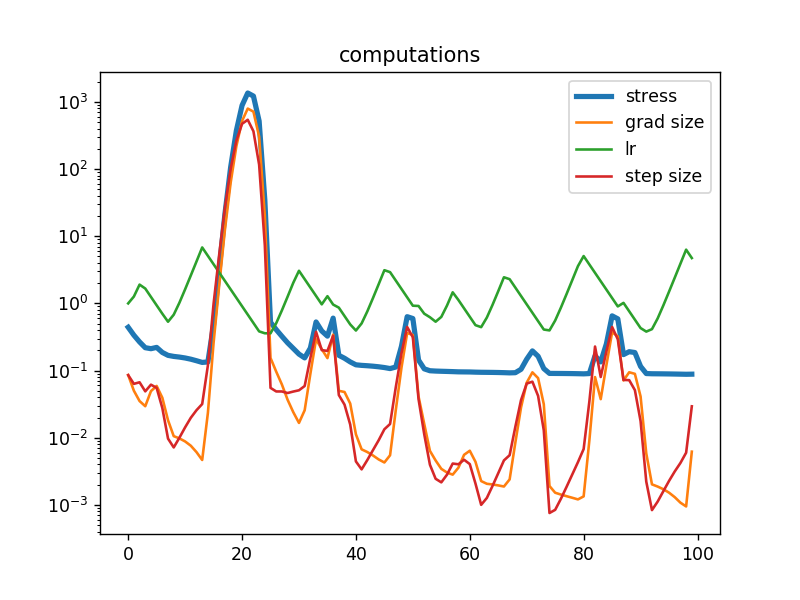

<IPython.core.display.Javascript object>


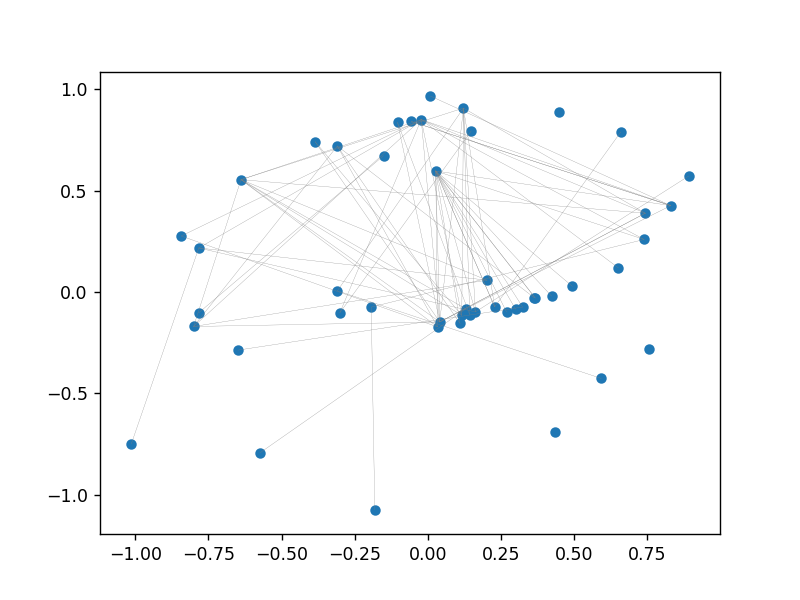

In [9]:
mds1.figureH()
mds1.figureX(edges=marriage_edges)

We can then run the basic algorithm.

In [12]:
mv = mview.basic(diss,min_grad=1e-4,max_iter=100,verbose=2)

mpse.MPSE():
  MPSE.initialize():
    X0 : random
    Q0 : random
  dissimilarity stats:
    number of views : 2
    number of points : 48
  embedding stats:
    embedding dimension : 3
    projection dimension : 2
  MPSE.gd():
    mpse method : optimize all
    initial stress : 4.24e-01
gd.multiple(): 
  computation parameters:
    stochastic : False
    constraint : True
    projected : [False, True]
    scheme : ['mm', 'mm']
    initial lr : [1.0, 1.0]
    min_grad : 1.00e-04
    max_iter : 100
    max_step : 1.00e+10
  progress:
100 : step = 2.96e-03, grad = 2.54e-02, cost = 1.15e-01, lr = 1.14e+00
  results:
    conclusion : maximum number of iterations reached
    total iterations : 99
    final cost : 1.15e-01
    time : 8.05e-01 [sec]
  Final stress : 2.04e-01


<IPython.core.display.Javascript object>


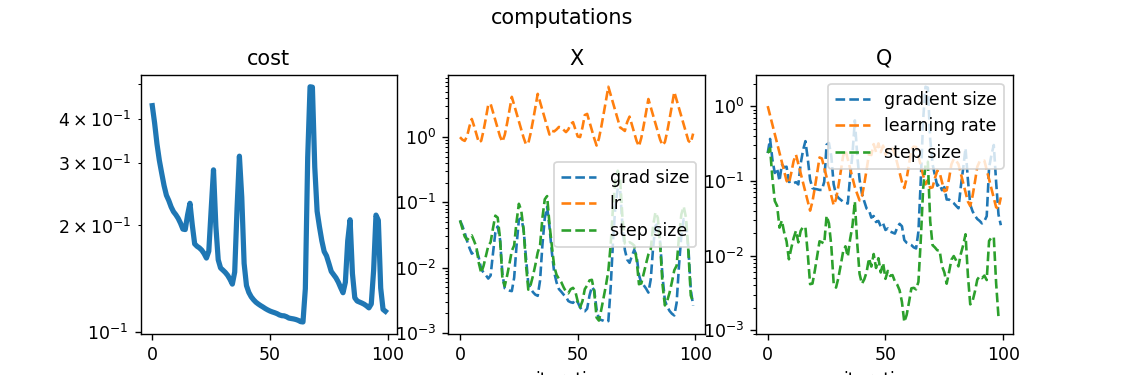

<IPython.core.display.Javascript object>


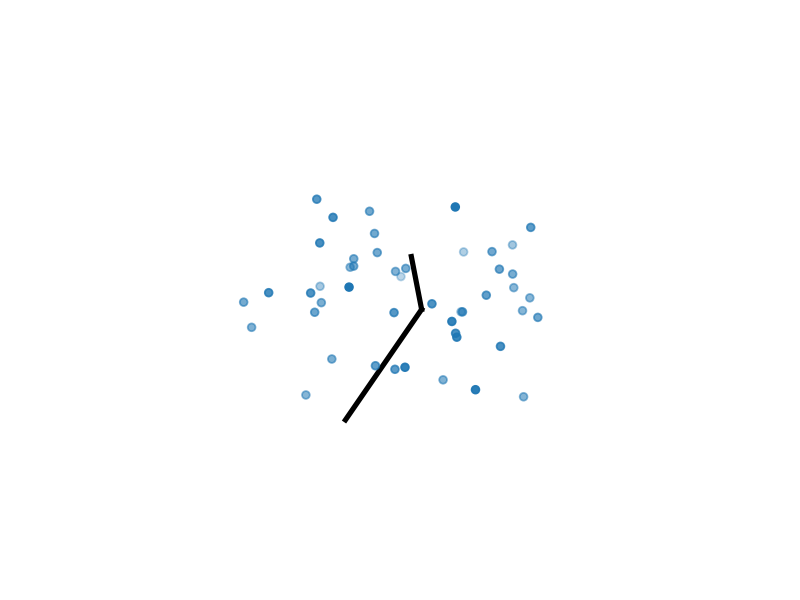

<IPython.core.display.Javascript object>


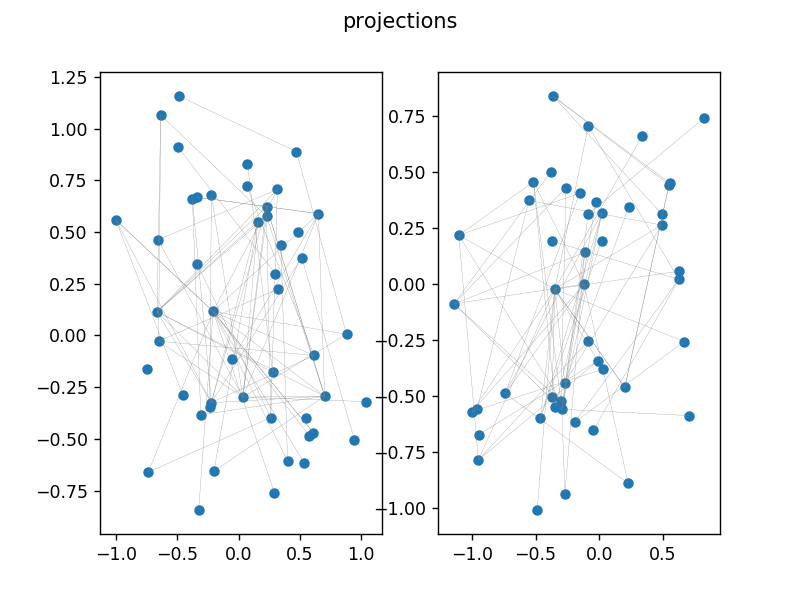

In [13]:
mv.figureH()
mv.figureX()
mv.figureY(include_colors=[marriage_count,loan_count],include_edges=True)

### Adding shortest paths

To obtain nicer results, given the small number of edges in the graph, we can add edges according to their shortest paths in the graph.

In [21]:
diss2 = mview.DISS(len(families2),node_labels=families2)
diss2.add_graph(edge_list=marriage_edges,edge_length=marriage_dissimilarities,
              shortest_path=True,label='marriage')
diss2.add_graph(edge_list=loan_edges,dissimilarity_list=loan_dissimilarities,
              shortest_path=True,label='loan')

mds.MDS():
  dissimilarity stats:
    number of points : 48
    number of edges : 904
    dissimilarity rms : 3.26e+00
  embedding stats:
    dimension : 2
  MDS.initialize( - automatic):
    method : random
    initial stress : 5.68e-01
  MDS.gd():
    initial stress : 5.68e-01
gd.single(): 
  computation parameters:
    stochastic : False
    constraint : False
    scheme : mm
    initial lr : 1
    max_iter : 100
    max_step : 1.00e+10
    final stress : 5.40e-01


<IPython.core.display.Javascript object>


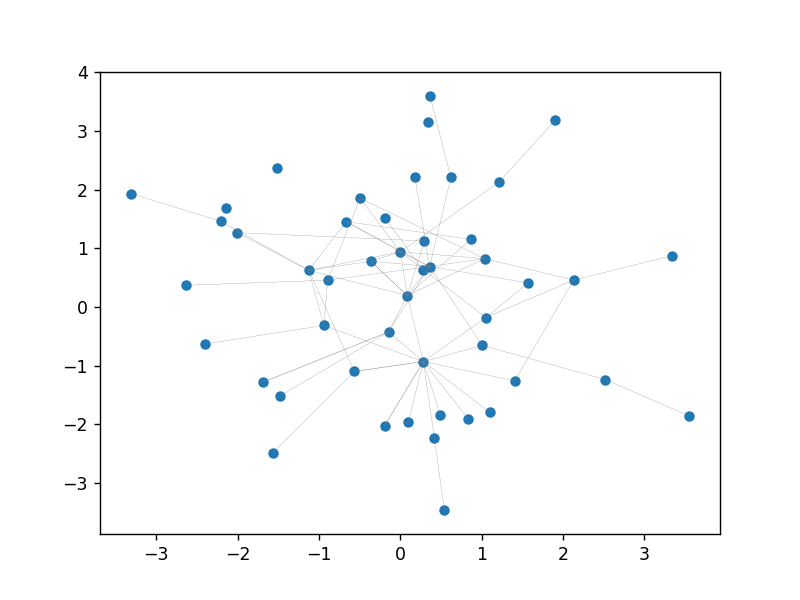

<IPython.core.display.Javascript object>


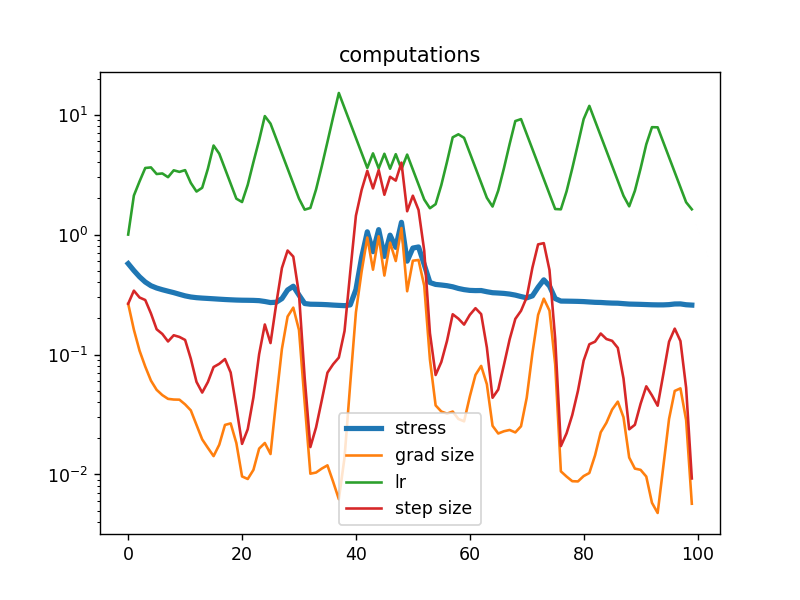

In [19]:
mds1 = mview.MDS(diss2.D[0],verbose=1)
mds1.gd(verbose=1)

mds1.figureX(edges=marriage_edges)
mds1.figureH()

mpse.MPSE():
  MPSE.initialize():
    X0 : random
    Q0 : random
  dissimilarity stats:
    number of views : 2
    number of points : 48
  embedding stats:
    embedding dimension : 3
    projection dimension : 2
  MPSE.gd():
    mpse method : optimize all
    initial stress : 7.97e-01
gd.multiple(): 
  computation parameters:
    stochastic : False
    constraint : True
    projected : [False, True]
    scheme : ['mm', 'mm']
    initial lr : [1.0, 1.0]
    min_grad : 1.00e-04
    max_iter : 100
    max_step : 1.00e+10
  progress:
100 : step = 5.05e-01, grad = 4.23e+00, cost = 3.20e-01, lr = 6.05e+00
  results:
    conclusion : maximum number of iterations reached
    total iterations : 99
    final cost : 3.20e-01
    time : 6.59e+00 [sec]
  Final stress : 6.34e-01


<IPython.core.display.Javascript object>


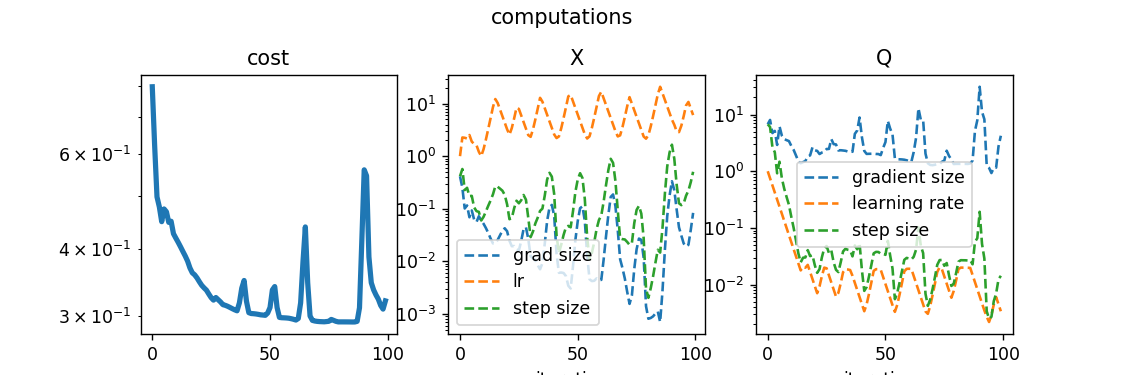

<IPython.core.display.Javascript object>


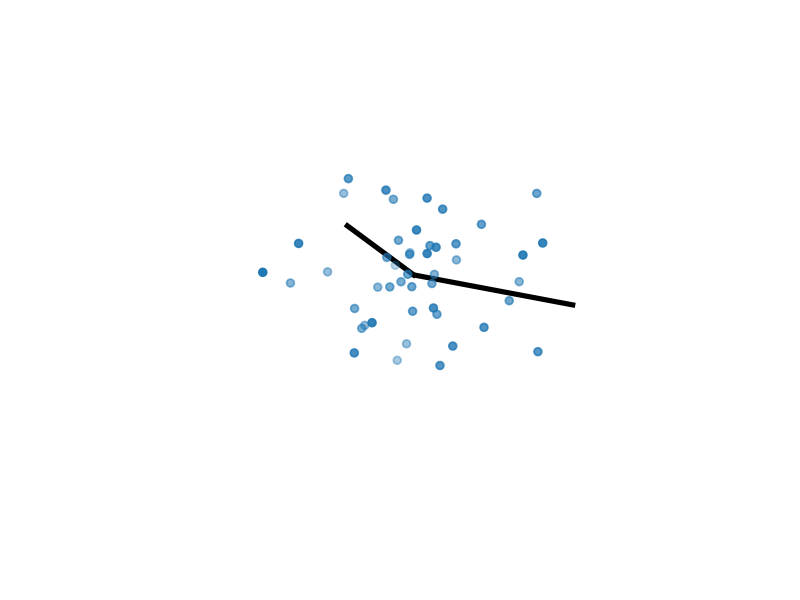

<IPython.core.display.Javascript object>


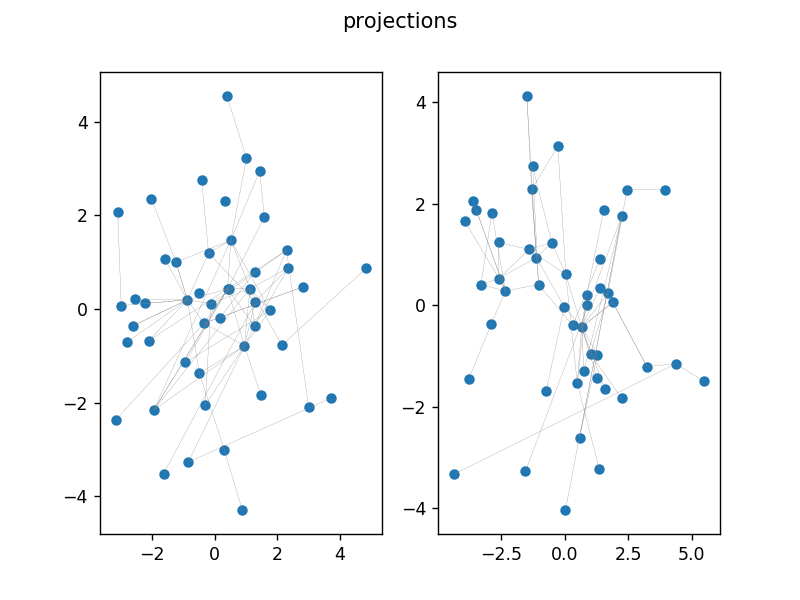

In [22]:
mv = mview.basic(diss2,min_grad=1e-4,max_iter=100,verbose=2)

mv.figureH()
mv.figureX()
mv.figureY(include_edges=[marriage_edges,loan_edges])

## 3 attributes: marriage, loan, business

In [ ]:
attributes3 = ['marriage','loan','business']

We reduce the families to those that have connections in each of the attributes of interest:

In [ ]:
families3 = florence.reduce_families(attributes3)
counts1 = florence.count_occurrences('marriage',families3)
counts2 = florence.count_occurrences('loan',families3)
counts3 = florence.count_occurrences('business',families3)
for family, count1, count2, count3 in zip(families3,counts1,counts2,counts3):
    print(f"{family}({count1},{count2},{count3})",end=", ")

We form a similarity graph for each attribute (containing list of edges and corresponding number of appereances).

In [ ]:
edges1, counts1 = \
florence.similarity_graph('marriage',allowed_families=families3)
dissimilarities1 = 1.0/np.array(counts1)

edges2, counts2 = \
florence.similarity_graph('loan',allowed_families=families3)
dissimilarities2 = 1.0/np.array(counts2)

edges3, counts3 = \
florence.similarity_graph('business',allowed_families=families3)
dissimilarities3 = 1.0/np.array(counts3)

We set up the set of dissimilarities using the DISS class.

In [ ]:
diss = mview.DISS(len(families2),node_labels=families2)
diss.add_graph(edge_list=edges1,edge_length=dissimilarities1,
              shortest_path=True,label='marriage')
diss.add_graph(edge_list=edges2,edge_length=dissimilarities2,
              shortest_path=True,label='loan')
diss.add_graph(edge_list=edges3,edge_length=dissimilarities3,
              shortest_path=True,label='business')

mv = mview.basic(diss,min_grad=1e-4,max_iter=100,verbose=2)

mv.figureH()
mv.figureX()
mv.figureY(include_edges=[edges1,edges2,edges3])